In [1]:
from preprocessing import *
from model_train_predict import *
from utils import *

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
ticker = 'AAPL' # Apple
number = 1000

df, data = load_data(ticker=ticker, number=number)
print(len(df))

df = df.copy()[:100]

Data saved to : stock_market_data-AAPL_2020-12-13.csv
1000


# 1. Exploratory Data Analys (EDA)

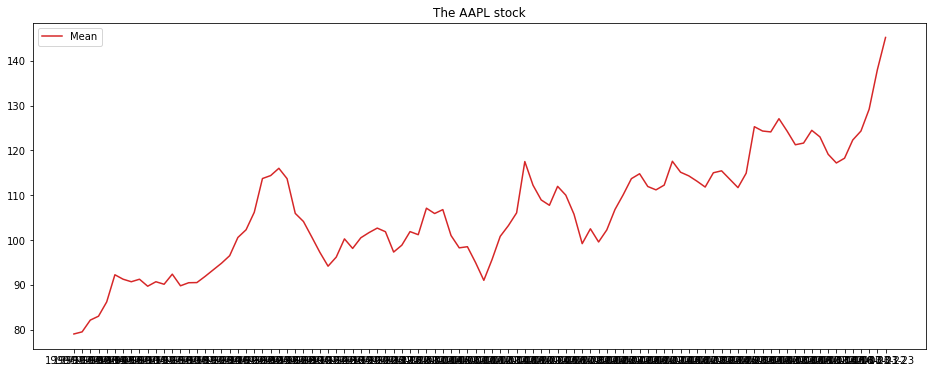

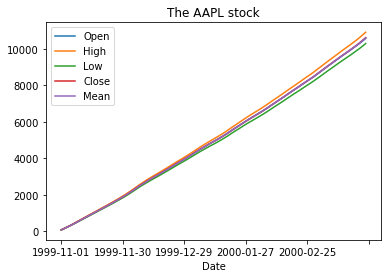

Dickey-Fuller test results

Test Statistic    -0.451498
p-value            0.901139
# of lags          0.000000
# of obs          99.000000
dtype: float64
Critical value at 1%: -3.49820
Critical value at 5%: -2.89121
Critical value at 10%: -2.58260


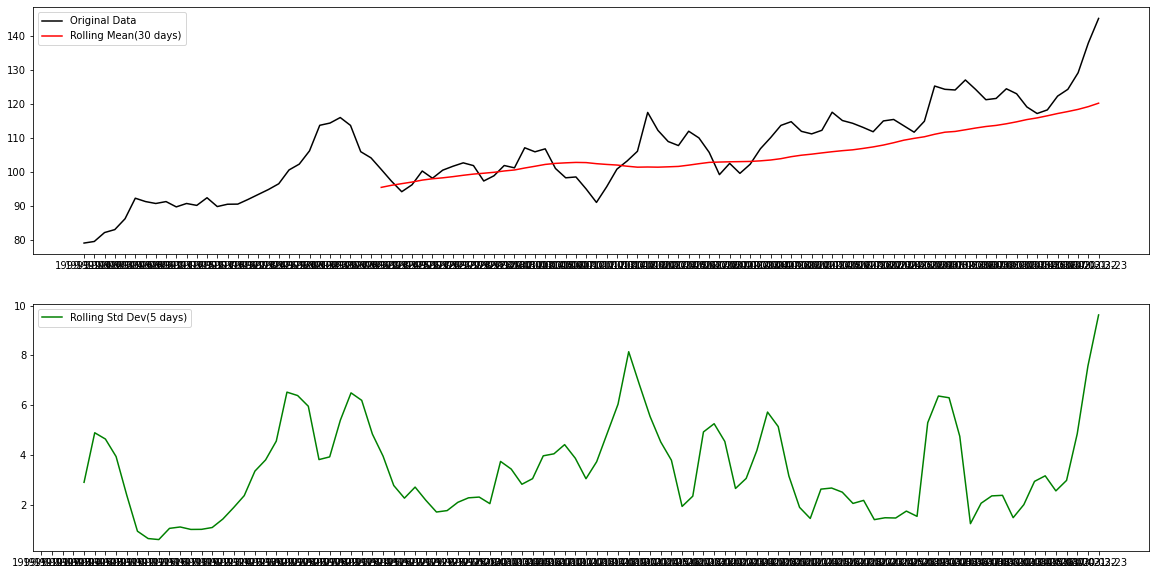

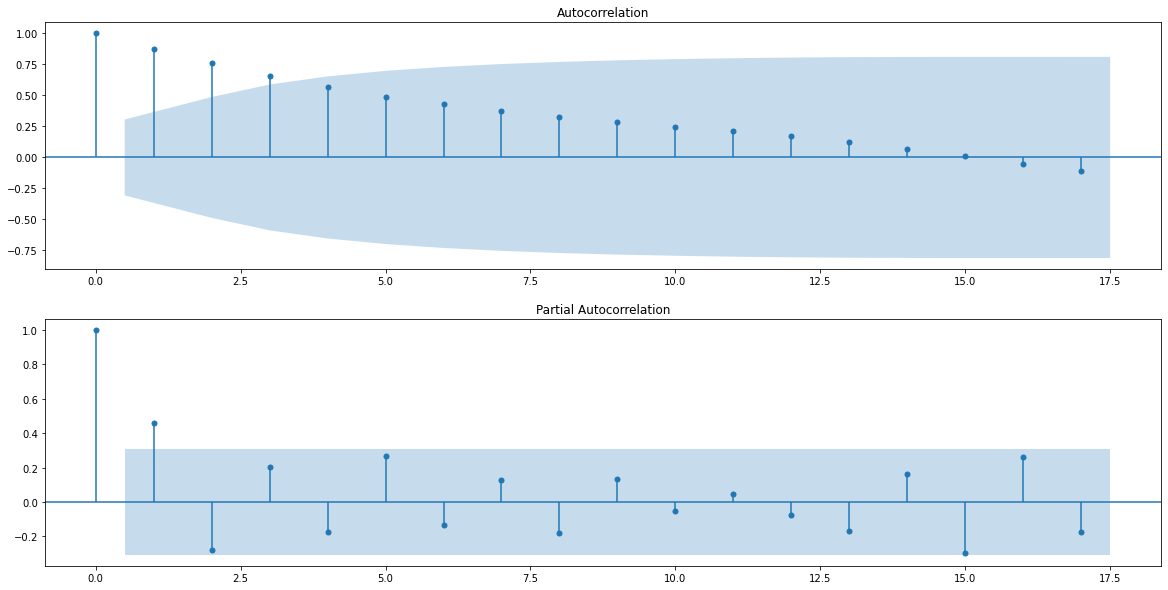

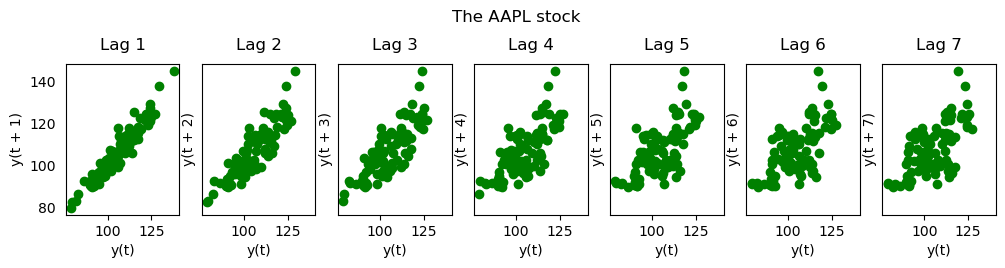

In [3]:
# overview data
plt.figure(figsize=(16,6))
plt.plot(df.Mean, label = "Mean" , color='tab:red')
plt.title(f'The {ticker} stock')
plt.legend(loc='best')
plt.show()

# Draw comulative plot
plot_cumsum(df, ticker)

# check stationarity
check_stationarity(df.Mean)

# Tính Autocorrection and Partial Autocorrection
autocorrelation_partialAutocorrection(df)

# Dùng lag_plot để view autocorrelation
autocorrelation(df, ticker)

## => timeStep = 4 + 1 = 5 (lấy 4 điểm trong quá khứ để dự đoán tương lai)

# 2. Setup general params 

## 2.1 search params for ARIMA

In [4]:
n = int(0.7 * len(data))

data_train = data[:n]
data_test = data[n:]

print(f'The shape of the data_train is {data_train.shape}')
print(f'The shape of the data_test is {data_test.shape}')

n = int(0.1 * len(data))
order = ARIMA_search_params(data[:n])

The shape of the data_train is (700, 1)
The shape of the data_test is (300, 1)
ARIMA(0, 0, 0) RMSE=18.219
ARIMA(0, 0, 1) RMSE=10.708
ARIMA(0, 0, 2) RMSE=7.522
ARIMA(0, 1, 0) RMSE=3.676
ARIMA(0, 1, 1) RMSE=3.431
ARIMA(0, 1, 2) RMSE=3.454
ARIMA(0, 2, 0) RMSE=3.805
ARIMA(0, 2, 1) RMSE=3.550
ARIMA(0, 2, 2) RMSE=3.341
ARIMA(1, 0, 0) RMSE=3.878
ARIMA(1, 0, 1) RMSE=3.659
ARIMA(1, 0, 2) RMSE=3.701
ARIMA(1, 1, 0) RMSE=3.438
ARIMA(1, 1, 1) RMSE=3.457
ARIMA(1, 1, 2) RMSE=3.495
ARIMA(1, 2, 0) RMSE=3.886
ARIMA(1, 2, 1) RMSE=3.355
ARIMA(1, 2, 2) RMSE=3.429
ARIMA(2, 0, 0) RMSE=3.678
ARIMA(2, 0, 1) RMSE=3.758
ARIMA(2, 0, 2) RMSE=3.771
ARIMA(2, 1, 0) RMSE=3.462
ARIMA(2, 1, 1) RMSE=3.491
ARIMA(2, 1, 2) RMSE=3.581
ARIMA(2, 2, 0) RMSE=3.614
ARIMA(2, 2, 1) RMSE=3.383
ARIMA(2, 2, 2) RMSE=3.439
Best ARIMA(0, 2, 2) RMSE=3.341


## 2.2. model params

In [5]:
timeStep=5
epochs = 500

# 3. Build models

## 3.1. ARIMA model

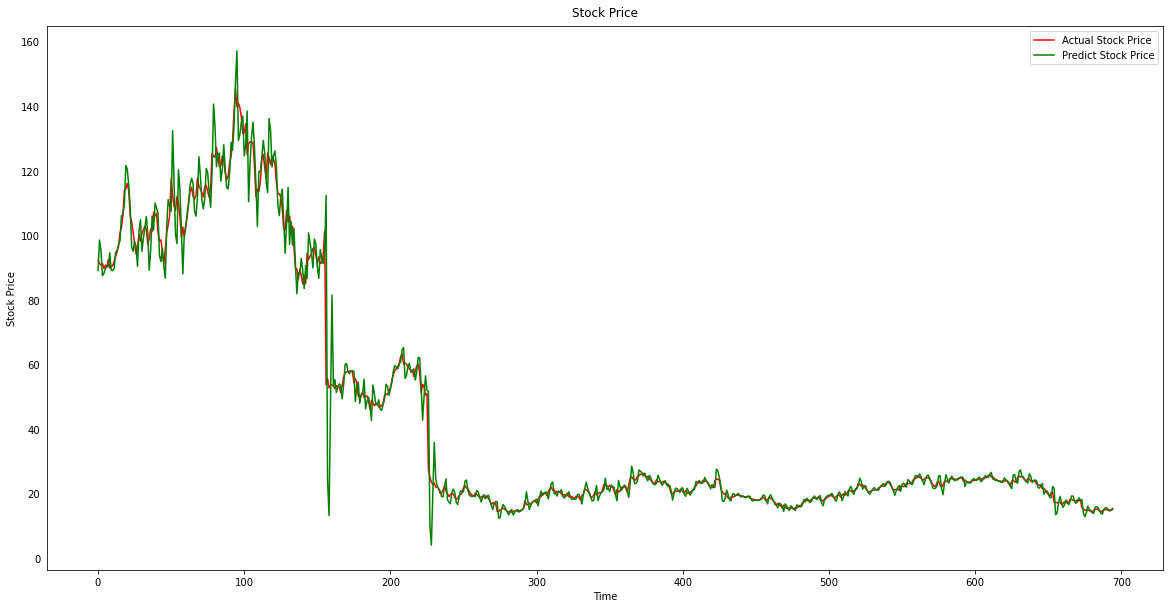

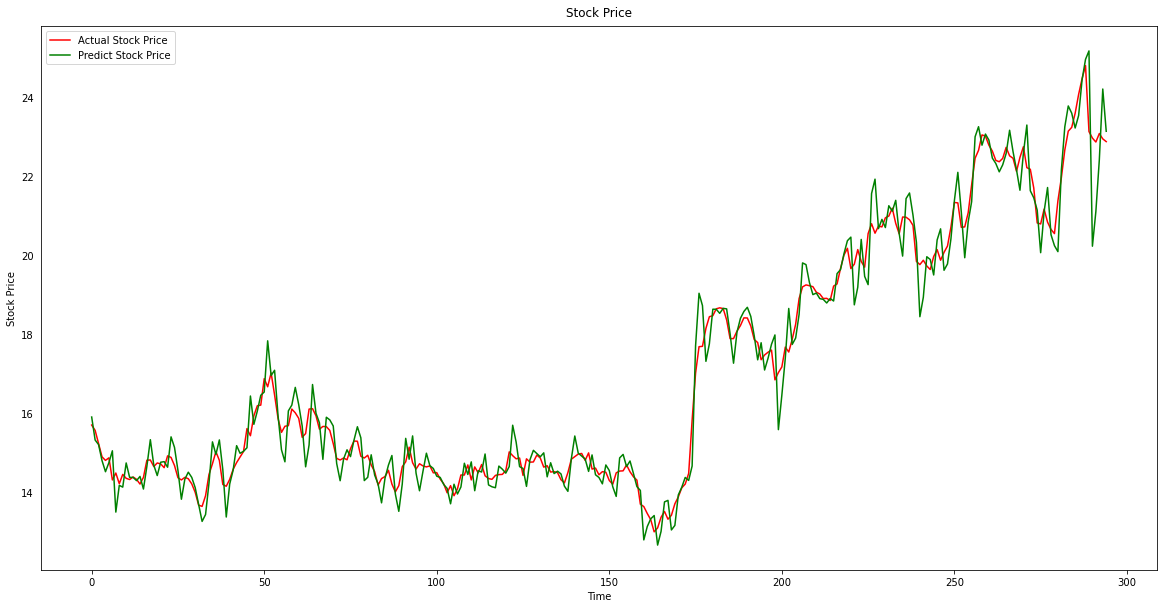

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 4.7045, 2.2238
RMSE_test, MAE_test = 0.5193, 0.3739

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5432
Precision  according to the trend: 0.5367
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5612
Precision  according to the trend: 0.5503


In [6]:
# predict
y_train, y_train_pred = ARIMA_single(data_train, timeStep=timeStep, order=order)

y_test, y_test_pred = ARIMA_single(data_test, timeStep=timeStep, order=order)

# plot graph
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)


print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.2. LSTM model

Epoch 1/500
18/18 [==============================] - 3s 151ms/step - loss: 0.0751 - val_loss: 0.0050
Epoch 2/500
18/18 [==============================] - 0s 16ms/step - loss: 0.0267 - val_loss: 0.0222
Epoch 3/500
18/18 [==============================] - 0s 15ms/step - loss: 0.0115 - val_loss: 0.0021
Epoch 4/500
18/18 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 2.4333e-04
Epoch 5/500
18/18 [==============================] - 0s 15ms/step - loss: 0.0042 - val_loss: 8.2150e-05
Epoch 6/500
18/18 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 1.9575e-04
Epoch 7/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 9.7062e-05
Epoch 8/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0033 - val_loss: 1.1917e-04
Epoch 9/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 1.3330e-04
Epoch 10/500
18/18 [==============================] - 0s 16ms/step - loss: 

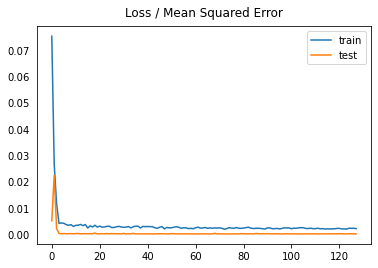

In [7]:
# train
model_lstm, hist_lstm, sc = LSTM_model(data_train, epochs=epochs, timeStep=timeStep)

plot_history(hist_lstm)

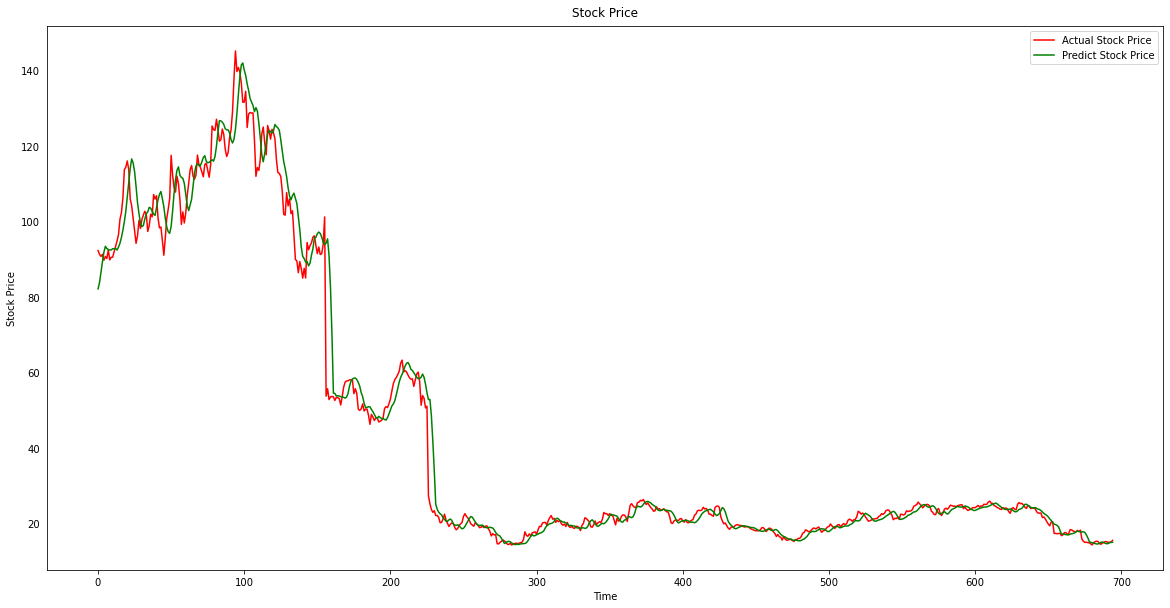

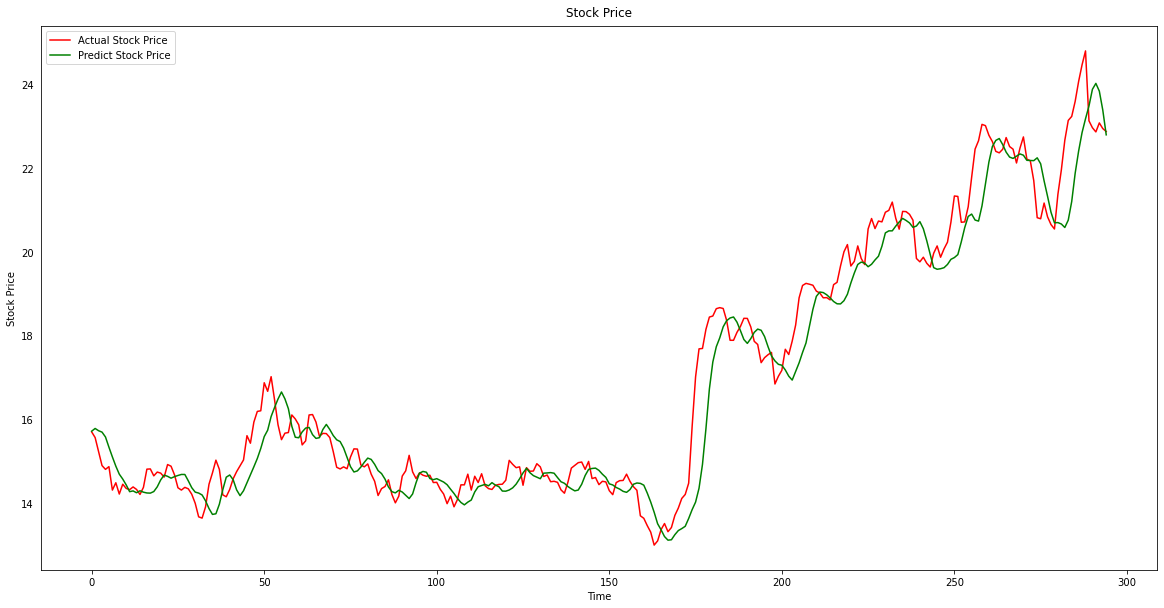

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 5.1426, 2.5958
RMSE_test, MAE_test = 0.7416, 0.5257

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5072
Precision  according to the trend: 0.5014
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5
Precision  according to the trend: 0.4899


In [8]:
y_train, y_train_pred = LSTM_predict(model_lstm, data_train, sc, timeStep=timeStep)

y_test, y_test_pred = LSTM_predict(model_lstm, data_test, sc, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.3. ARIMA_LSTM model

17 - val_loss: 0.0246
Epoch 41/500
18/18 [==============================] - 0s 12ms/step - loss: 0.5755 - val_loss: 0.0193
Epoch 42/500
18/18 [==============================] - 0s 13ms/step - loss: 0.5681 - val_loss: 0.0194
Epoch 43/500
18/18 [==============================] - 0s 13ms/step - loss: 0.4972 - val_loss: 0.0221
Epoch 44/500
18/18 [==============================] - 0s 13ms/step - loss: 0.5155 - val_loss: 0.0304
Epoch 45/500
18/18 [==============================] - 0s 13ms/step - loss: 0.4844 - val_loss: 0.0246
Epoch 46/500
18/18 [==============================] - 0s 13ms/step - loss: 0.5580 - val_loss: 0.0200
Epoch 47/500
18/18 [==============================] - 0s 13ms/step - loss: 0.4703 - val_loss: 0.0217
Epoch 48/500
18/18 [==============================] - 0s 12ms/step - loss: 0.4513 - val_loss: 0.0190
Epoch 49/500
18/18 [==============================] - 0s 13ms/step - loss: 0.4492 - val_loss: 0.0180
Epoch 50/500
18/18 [==============================] - 0s 13ms/step - 

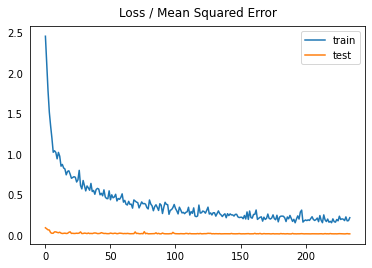

In [9]:
model, history = ARIMA_LSTM_model(data_train, order=order, epochs=epochs, timeStep=timeStep)

plot_history(history)

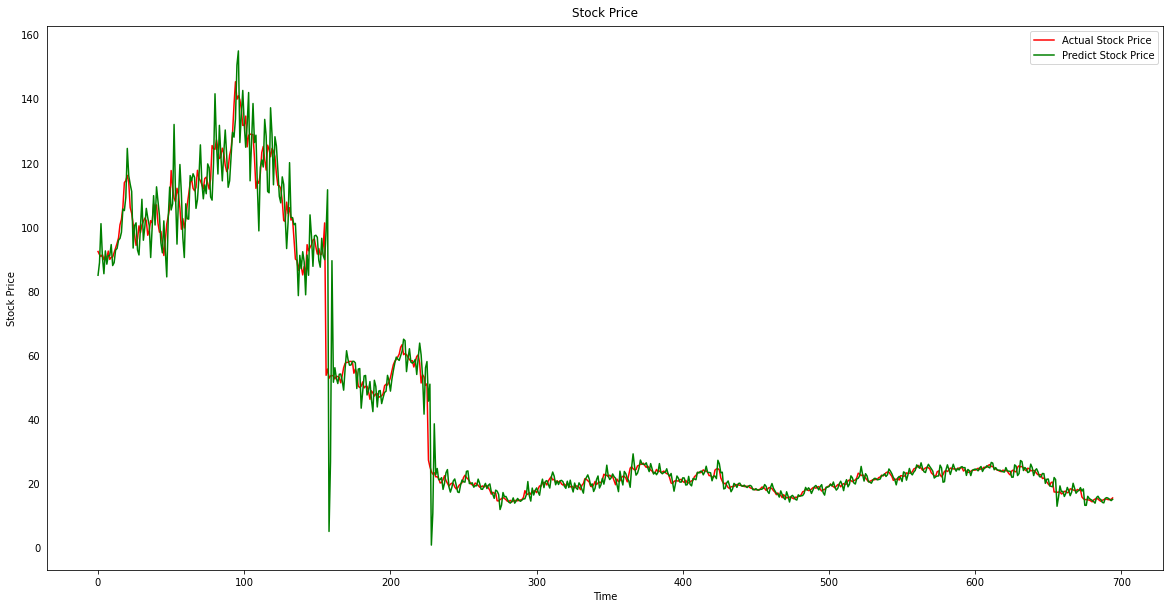

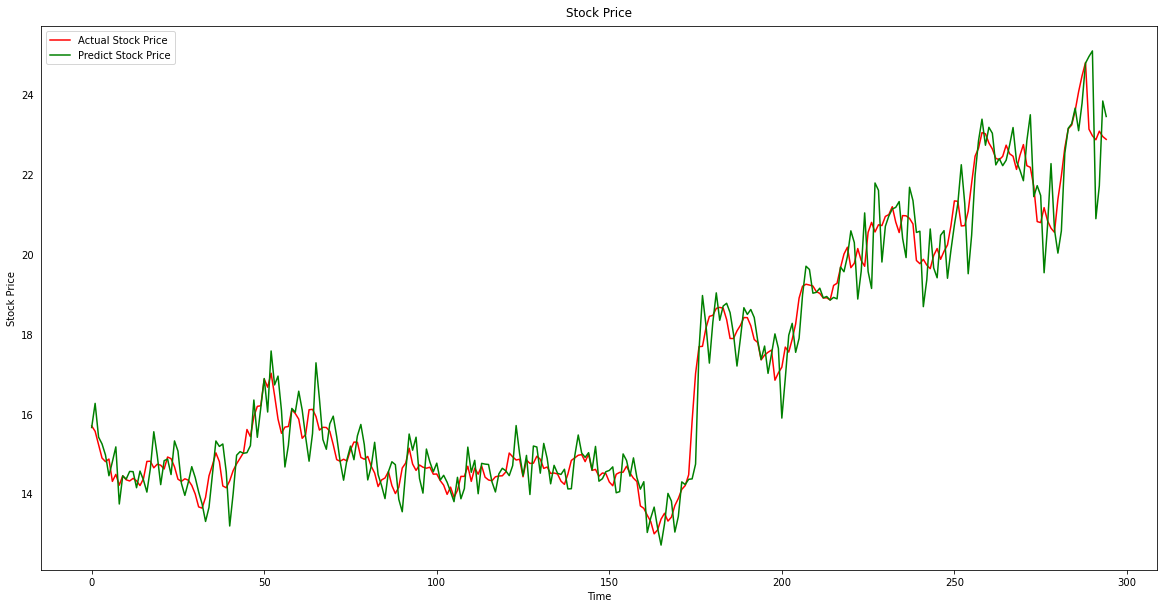

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 5.6934, 2.8257
RMSE_test, MAE_test = 0.6291, 0.4714

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.4813
Precision  according to the trend: 0.4762
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5306
Precision  according to the trend: 0.5211


In [10]:
y_train, y_train_pred = ARIMA_LSTM_predict(model, data_train,order=order, timeStep=timeStep)

y_test, y_test_pred = ARIMA_LSTM_predict(model, data_test, order=order, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)